<a href="https://colab.research.google.com/github/girijasaigunupuru/Data-Analysis-of-the-Indian-Premier-League/blob/main/ipl_analysis_self_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [196]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [197]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
deliveries =  pd.read_csv('/content/drive/MyDrive/data_files/deliveries.csv',)
matches=pd.read_csv('/content/drive/MyDrive/data_files/matches.csv')

In [ ]:
matches.head()

In [ ]:
#checking basic stats'
matches.describe()

In [ ]:
matches.isnull().sum()

In [ ]:
deliveries.info()

In [ ]:
#checking for null values in corresponding columns
deliveries.isnull().sum()

In [ ]:
#Filling the values of city based on venue
conditions = [matches["venue"] == "Rajiv Gandhi International Stadium, Uppal",matches["venue"] == "Maharashtra Cricket Association Stadium",
              matches["venue"] == "Saurashtra Cricket Association Stadium", matches["venue"] == "Holkar Cricket Stadium",
              matches["venue"] == "M Chinnaswamy Stadium",matches["venue"] == "Wankhede Stadium",
              matches["venue"] == "Eden Gardens",matches["venue"] == "Feroz Shah Kotla",
              matches["venue"] == "Punjab Cricket Association IS Bindra Stadium, Mohali",matches["venue"] == "Green Park",
              matches["venue"] == "Punjab Cricket Association Stadium, Mohali",matches["venue"] == "Dr DY Patil Sports Academy",
              matches["venue"] == "Sawai Mansingh Stadium", matches["venue"] == "MA Chidambaram Stadium, Chepauk", 
              matches["venue"] == "Newlands", matches["venue"] == "St George's Park" , 
              matches["venue"] == "Kingsmead", matches["venue"] == "SuperSport Park",
              matches["venue"] == "Buffalo Park", matches["venue"] == "New Wanderers Stadium",
              matches["venue"] == "De Beers Diamond Oval", matches["venue"] == "OUTsurance Oval", 
              matches["venue"] == "Brabourne Stadium",matches["venue"] == "Sardar Patel Stadium", 
              matches["venue"] == "Barabati Stadium", matches["venue"] == "Vidarbha Cricket Association Stadium, Jamtha",
              matches["venue"] == "Himachal Pradesh Cricket Association Stadium",matches["venue"] == "Nehru Stadium",
              matches["venue"] == "Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium",matches["venue"] == "Subrata Roy Sahara Stadium",
              matches["venue"] == "Shaheed Veer Narayan Singh International Stadium",matches["venue"] == "JSCA International Stadium Complex",
              matches["venue"] == "Sheikh Zayed Stadium",matches["venue"] == "Sharjah Cricket Stadium",
              matches["venue"] == "Dubai International Cricket Stadium",matches["venue"] == "M. A. Chidambaram Stadium",
              matches["venue"] == "Feroz Shah Kotla Ground",matches["venue"] == "M. Chinnaswamy Stadium",
              matches["venue"] == "Rajiv Gandhi Intl. Cricket Stadium" ,matches["venue"] == "IS Bindra Stadium",matches["venue"] == "ACA-VDCA Stadium"]
values = ['Hyderabad', 'Mumbai', 'Rajkot',"Indore","Bengaluru","Mumbai","Kolkata","Delhi","Mohali","Kanpur","Mohali","Pune","Jaipur","Chennai","Cape Town","Port Elizabeth","Durban",
          "Centurion",'Eastern Cape','Johannesburg','Northern Cape','Bloemfontein','Mumbai','Ahmedabad','Cuttack','Jamtha','Dharamshala','Chennai','Visakhapatnam','Pune','Raipur','Ranchi',
          'Abu Dhabi','Sharjah','Dubai','Chennai','Delhi','Bengaluru','Hyderabad','Mohali','Visakhapatnam']
matches['city'] = np.where(matches['city'].isnull(),
                              np.select(conditions, values),
                              matches['city'])

#Removing records having null values in "winner" column
matches=matches[matches["winner"].notna()]

In [ ]:
matches['team1'].unique()

In [ ]:
matches.replace(['Rising Pune Supergiant', 'Pune Warriors',
       'Delhi Capitals'],['Rising Pune Supergiants','Rising Pune Supergiants','Delhi Daredevils'], inplace=True)

In [ ]:
matches1=matches.copy()

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
matches['team1']= label_encoder.fit_transform(matches['team1'])

matches['team1'].unique()


In [ ]:

matches['team2']= label_encoder.fit_transform(matches['team2'])
matches['toss_winner']= label_encoder.fit_transform(matches['toss_winner']) 
matches['winner']=label_encoder.fit_transform(matches['winner']) 
matches['venue']=label_encoder.fit_transform(matches['venue'])  
                                    


In [ ]:
matches.head()

In [ ]:
matches.drop(['umpire3'],axis=1,inplace=True)

In [ ]:
matches.head()

In [ ]:
matches = matches[matches['winner'].notna()]

In [ ]:
matches

In [ ]:
matches1.head()

In [ ]:
matches2=matches1[['season','winner']]

In [ ]:
matches3=matches2.groupby('season')['winner'].value_counts()

In [ ]:
matches3

In [ ]:
"""
for i, v in win_per_season.iteritems():
    print(i, v)
    
for items in win_per_season.iteritems():
    print(items)    
"""
year = 2008
win_per_season_df = pd.DataFrame(columns=['year', 'team', 'wins'])
for items in matches3.iteritems():    
    if items[0][0]==year:
        print(items)
        win_series = pd.DataFrame({
            'year': [items[0][0]],
            'team': [items[0][1]],
            'wins': [items[1]]
        })
        win_per_season_df = win_per_season_df.append(win_series)
        year += 1   

In [ ]:
win_per_season_df.head()

In [ ]:
import seaborn as sns
sns.catplot(x='wins',y='team',data=win_per_season_df,hue='year',kind='bar')

In [ ]:
# 2) Which stadium hosted the most number of IPL matches?
# Explore value_counts() function in PD and make a separate df with columns “venue” and “matches”.
# Make a bar plot with Seaborn / Plotly. (Take help from (1) in EDA resources and from (5) for plotly
# plots)


In [ ]:
matches1['venue'].value_counts()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.catplot(y='venue',data=matches1,kind='count')

In [ ]:
matches1['winner'].value_counts(sort=True,normalize=True)

In [ ]:
matches1['player_of_match'].value_counts()

In [ ]:
matches1['toss_winner'].value_counts()

In [ ]:
team_wins=matches1['winner'].value_counts()
team_wins

In [ ]:
team_wins_df = pd.DataFrame(columns=['team', 'wins'])

for items in team_wins.iteritems(): 
   series = pd.DataFrame({
            'team': [items[0]],
            'wins': [items[1]]
        })
   team_wins_df = team_wins_df.append(series,ignore_index=True)

In [ ]:
team_wins_df

In [ ]:
sns.barplot(x='wins', y='team', data=team_wins_df, palette='Paired');


In [ ]:
player_wins=matches1['player_of_match'].value_counts()
player_wins

In [ ]:
player_wins_df = pd.DataFrame(columns=['player', 'wins'])
count=0
for items in player_wins.iteritems(): 

  if count>9:
    break
  else: 
    series = pd.DataFrame({
            'player': [items[0]],
            'wins': [items[1]]
        })
  player_wins_df = player_wins_df.append(series,ignore_index=True)
  count=count+1

In [ ]:
sns.barplot(x='wins', y='player', data=player_wins_df, palette='Paired');


In [ ]:
team_tosswins=matches1['toss_winner'].value_counts()
team_tosswins

In [ ]:
team_tosswins_df = pd.DataFrame(columns=['team', 'wins'])

for items in team_tosswins.iteritems(): 
   series = pd.DataFrame({
            'team': [items[0]],
            'tosswins': [items[1]]
        })
   team_tosswins_df = team_tosswins_df.append(series,ignore_index=True)

In [ ]:
sns.barplot(x='tosswins', y='team', data=team_tosswins_df, palette='Paired');


In [ ]:
victories_runs=matches1['win_by_runs'].value_counts()
victories_runs.sort_values(ascending=True)

In [ ]:
victories_wickets=matches1['win_by_wickets'].value_counts()
victories_wickets

In [ ]:
deliveries.head()

In [ ]:
deliveries.head()

In [ ]:
cen = deliveries.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
cen = cen[cen['batsman_runs']>=100]
cen = cen.groupby(['batsman']).agg({'count'})
cen.columns = cen.columns.droplevel()
cen = cen.sort_values(by='count',ascending=False).reset_index()

half_cen = deliveries.groupby(['batsman','match_id']).agg({'batsman_runs':'sum'})
half_cen = half_cen[half_cen['batsman_runs']>=50]
half_cen = half_cen[half_cen['batsman_runs']<100]
half_cen = half_cen.groupby(['batsman']).agg({'count'})
half_cen.columns = half_cen.columns.droplevel()
half_cen = half_cen.sort_values(by='count',ascending=False).reset_index()


In [ ]:
matches.head()

In [ ]:
matches.loc[matches["winner"]==matches["team1"],"team1_win"]=1
matches.loc[matches["winner"]!=matches["team1"],"team1_win"]=0
matches.loc[matches["toss_winner"]==matches["team1"],"team1_toss_win"]=1
matches.loc[matches["toss_winner"]!=matches["team1"],"team1_toss_win"]=0
matches["team1_bat"]=0
matches.loc[(matches["team1_toss_win"]==1) & (matches["toss_decision"]=="bat"),"team1_bat"]=1
matches.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
prediction_df=matches[["team1","team2","team1_toss_win","team1_bat","team1_win","venue"]]
correlated_features = set()
correlation_matrix = prediction_df.drop('team1_win', axis=1).corr()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            column = correlation_matrix.columns[i]
            correlated_features.add(column)
            
prediction_df.drop(columns=correlated_features)
prediction_df.head()

In [ ]:
prediction_df['team1_win'].value_counts()

In [ ]:
X = prediction_df.drop('team1_win', axis=1)
target = prediction_df['team1_win']
target=target.astype(int)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.1, random_state=2,shuffle=True)

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of logistic regression classifier on test set: {:.4f}'.format(logreg.score(X_test, y_test)))

#SVM
svm=SVC()
svm.fit(X_train,y_train)
svm.score(X_test,y_test)
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of SVM classifier on test set: {:.4f}'.format(svm.score(X_test, y_test)))

#Decision Tree Classifier
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dtree.score(X_test,y_test)
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of decision tree classifier on test set: {:.4f}'.format(dtree.score(X_test, y_test)))

#Random Forest Classifier
randomForest= RandomForestClassifier(n_estimators=100)
randomForest.fit(X_train,y_train)
randomForest.score(X_test,y_test)
y_pred = randomForest.predict(X_test)
print("Confusion matrix\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Accuracy of random forest classifier on test set: {:.4f}'.format(randomForest.score(X_test, y_test)))



In [ ]:
df1=pd.read_csv('/content/drive/MyDrive/data_files/IPL Ball-by-Ball 2008-2020.csv')
df2=pd.read_csv('/content/drive/MyDrive/data_files/IPL Matches 2008-2020.csv')

df2.head()

In [ ]:
data = pd.merge(left=df2, right=df1, on='id', how='right')
print(data.shape)
data.head()

In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = pd.DatetimeIndex(data['date']).year
data['over'] = data['over']+1
data.head()

In [ ]:
data['inning'] = data['id'].astype(str)+(data['batting_team']).astype(str)
data.head()

In [ ]:
list1 = data['inning'].unique()
(list1)

In [ ]:
data.loc[(data['over'] == 20) & (data['ball'] == 6) & (data['inning'] == list1[0])]

In [ ]:
data2 = data.copy()
data2 = data2.groupby(by=['inning']).sum()['total_runs'].reset_index()
data2.head()

In [ ]:
data3 = pd.merge(left=data2, right=data, on='inning', how='right')
print(data3.shape)
data3.head()

In [ ]:
container = pd.DataFrame()
for i in range(len(list1)):
    one_inning = data3.loc[data3['inning']==list1[i]]
    one_inning = one_inning.sort_values(['over', 'ball'], ascending=[True, True])
    one_inning = one_inning[['over','ball',
            'batsman_runs','extra_runs','total_runs_y','non_boundary','is_wicket','total_runs_x']].reset_index(drop=True)
    one_inning['CUMSUM_runs'] = one_inning['total_runs_y'].cumsum()
    one_inning['CUMSUM_wickets'] = one_inning['is_wicket'].cumsum()

    one_inning.tail()
    frame = [container,one_inning]
    container = pd.concat(frame)
print(data3.shape)
print(container.shape)

In [ ]:
data3 = container.copy()
container.head()

In [ ]:
featureColumns = ['over','ball',
         'batsman_runs','extra_runs','total_runs_y','non_boundary','is_wicket','CUMSUM_runs','CUMSUM_wickets']
print(len(featureColumns))

In [ ]:
data3['over_cur'] = data3['over'] + data3['ball']/10
data3 = data3[['over_cur',
         'batsman_runs','total_runs_y','CUMSUM_runs','CUMSUM_wickets','total_runs_x']]
data3.astype(float)
data3 = data3.fillna(-99.00)
data3.isnull().values.any()
import pandas as pd
from sklearn import preprocessing
data3.head()

In [ ]:
 !gdown --id  1CYejwMjjr1-8LoV4zJyU--QDNQBG0zbT

In [ ]:
def custom_accuracy(y_test,y_pred,thresold=10):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
        # else:
        #     print('p',y_pred[i]*300,y_test[i]*300)
    return (right)

In [ ]:
def custom_accuracy2(y_test,y_pred,thresold):
    right = 0
    l = len(y_pred)
    for i in range(0,l):
        if(abs(y_pred[i]-y_test[i]) <= thresold):
            right += 1
    return ((right/l)*100)

In [ ]:
dataset = pd.read_csv('/content/ipl.csv')
print("Size of Dataset:", len(dataset))
X = dataset.iloc[:,[7,8,9,12,13]].values #Input features
y = dataset.iloc[:, 14].values #Label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,SGDRegressor,ElasticNet
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.utils.validation import check_array 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import LinearSVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor

In [ ]:
GradientBoostingRegressor().get_params().keys()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_rf = {
              #"n_estimators": [200,300],
              "learning_rate": [0.25,0.5,0.75],
              "max_depth": [10,14,18],           
             }         
gr_rf = GridSearchCV(GradientBoostingRegressor(),param_grid_rf,cv=2,verbose=2)
gr_rf.fit(X_train,y_train)

In [ ]:
gr_rf.best_params_

{'learning_rate': 0.25, 'max_depth': 10}

In [ ]:
rf_best = GradientBoostingRegressor(random_state=300,
                                    n_estimators =5000,
                                    learning_rate=gr_rf.best_params_['learning_rate'],
                                    max_depth = gr_rf.best_params_['max_depth'],
                                    )
rf_best.fit(X_train,y_train)
y_pred = rf_best.predict(X_test)
score = rf_best.score(X_test,y_test)
print("R-squared value: {:.3f} ".format( score))
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_test,y_pred,10)))

R-squared value: 0.633 
Custom accuracy: 65.323 %


[]

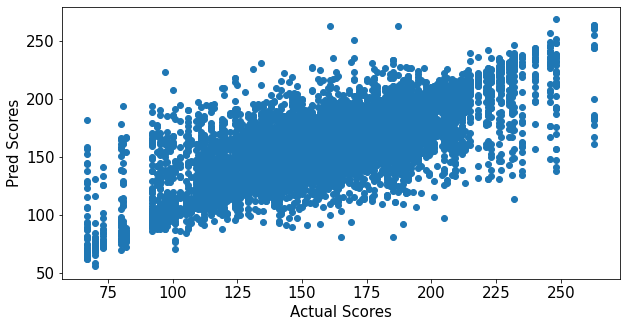

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Pred Scores')
plt.plot()

In [ ]:
RandomForestRegressor().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid_rf2 = {
              "n_estimators": [100,300,500],
              "max_depth": [10,50,100],           
             }         
gr_rf2 = GridSearchCV(RandomForestRegressor(),param_grid_rf2,cv=5)
gr_rf2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 50, 100],
                         'n_estimators': [100, 300, 500]})

In [ ]:
gr_rf2.best_params_

{'max_depth': 100, 'n_estimators': 500}

In [ ]:

rf_best2 = RandomForestRegressor(random_state=300,max_features=None,
                                    n_estimators=gr_rf2.best_params_['n_estimators'],
                                    max_depth = gr_rf2.best_params_['max_depth'],
                                    )
rf_best2.fit(X_train,y_train)
y_pred = rf_best2.predict(X_test)
score = rf_best2.score(X_test,y_test)
print("R-squared value: {:.3f} ".format( score))
print("Custom accuracy: {:.3f} %".format(custom_accuracy2(y_test,y_pred,10)))

R-squared value: 0.676 
Custom accuracy: 65.686 %


[]

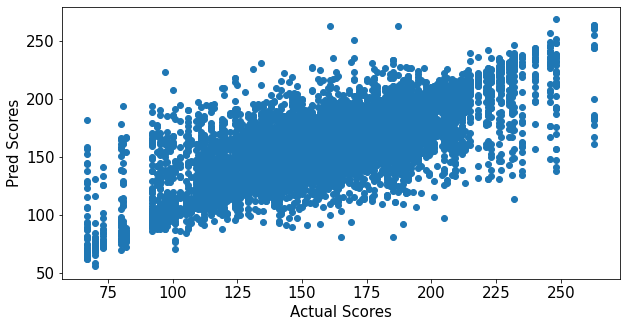

In [ ]:
plt.rcParams.update({'font.size': 15})
plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Scores')
plt.ylabel('Pred Scores')
plt.plot()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving IPL Player Stats - 2016 till 2019.csv to IPL Player Stats - 2016 till 2019.csv


In [ ]:
data=pd.read_csv('IPL Player Stats - 2016 till 2019.csv')

In [ ]:
data.head()

,Team,Player,Tournament,Matches,Batting Innings,Not Out,Runds Scored,Highest Score,Batting Average,Balls Faced,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,Delhi Daredevils,CH Morris,IPL 2016,12,7,4,195,82*,65.00,109,...,308,13,2/30,23.69,7.00,20.3,0,0,8,0
1,Delhi Daredevils,CH Morris,IPL 2017,9,9,4,154,52*,30.80,94,...,240,12,4/26,20.00,7.74,15.5,1,0,5,0
2,Delhi Daredevils,CH Morris,IPL 2018,4,4,3,46,27*,46.00,26,...,143,3,2/41,47.66,10.21,28.0,0,0,2,0
3,Delhi Daredevils,JP Duminy,IPL 2016,10,8,3,191,49*,38.20,156,...,55,2,1/4,27.50,7.85,21.0,0,0,3,0
4,Delhi Daredevils,Q de Kock,IPL 2016,13,13,1,445,108,37.08,327,...,-,-,-,-,-,-,-,-,2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 631 entries, 0 to 630
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Team                  631 non-null    object
 1   Player                631 non-null    object
 2   Tournament            631 non-null    object
 3   Matches               631 non-null    int64 
 4   Batting Innings       631 non-null    object
 5   Not Out               631 non-null    object
 6   Runds Scored          631 non-null    object
 7   Highest Score         631 non-null    object
 8   Batting Average       631 non-null    object
 9   Balls Faced           631 non-null    object
 10  Batting Strike Rate   631 non-null    object
 11  100                   631 non-null    object
 12  50                    631 non-null    object
 13  0                     631 non-null    object
 14  4s                    631 non-null    object
 15  6s                    631 non-null    ob

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ipl_dataset.csv to ipl_dataset.csv


In [ ]:
ipl= pd.read_csv('ipl_dataset.csv')

In [ ]:
data['Player'].unique().shape

(268,)

In [ ]:
ipl['striker'].unique().shape

(235,)

In [ ]:
new_ipl = pd.merge(ipl,data,left_on='striker',right_on='Player')

In [ ]:
new_ipl.drop(['wicket_type', 'player_dismissed','Unnamed: 0','match_id'],axis=1,inplace=True)

In [ ]:
new_ipl.head()

,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,1,0
1,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,0,0
2,M Chinnaswamy Stadium,1,0.2,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,0.0,...,-,-,-,-,-,-,-,-,8,0
3,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,...,-,-,-,-,-,-,-,-,1,0
4,M Chinnaswamy Stadium,1,0.3,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,SC Ganguly,P Kumar,0.0,1.0,...,-,-,-,-,-,-,-,-,0,0


In [ ]:
new_ipl.columns

Index(['venue', 'innings', 'ball', 'batting_team', 'bowling_team', 'striker',
       'non_striker', 'bowler', 'runs_off_bat', 'extras', 'run', 'wickets',
       'truns', 'y', 'Team', 'Player', 'Tournament', 'Matches',
       'Batting Innings', 'Not Out', 'Runds Scored', 'Highest Score',
       'Batting Average', 'Balls Faced', 'Batting Strike Rate', '100', '50',
       '0', '4s', '6s', 'Bowling Innings', 'Overs Bowled', 'Maidens Bowled',
       'Runs Conceded', 'Wickets Taken', 'Best Bowling Figures',
       'Bowling Average', 'Bowling Economy Rate', 'Bowling Strike Rate',
       '4+ Innings Wickets', '5+ Innings Wickets', 'Catches Taken',
       'Stumpings Made'],
      dtype='object')

In [ ]:
listf = []
for c in new_ipl.columns:
    if new_ipl[c].dtype==object:
        print(c,"->" ,new_ipl[c].dtype)
        listf.append(c)

venue -> object
batting_team -> object
bowling_team -> object
striker -> object
non_striker -> object
bowler -> object
Team -> object
Player -> object
Tournament -> object
Batting Innings -> object
Not Out -> object
Runds Scored -> object
Highest Score -> object
Batting Average -> object
Balls Faced -> object
Batting Strike Rate -> object
100 -> object
50 -> object
0 -> object
4s -> object
6s -> object
Bowling Innings -> object
Overs Bowled -> object
Maidens Bowled -> object
Runs Conceded -> object
Wickets Taken -> object
Best Bowling Figures -> object
Bowling Average -> object
Bowling Economy Rate -> object
Bowling Strike Rate -> object
4+ Innings Wickets -> object
5+ Innings Wickets -> object


In [ ]:
def labelEncoding(data):
    dataset = pd.DataFrame(new_ipl)
    feature_dict ={}
    #features={}
    for feature in dataset:
        if dataset[feature].dtype==object:
            le = preprocessing.LabelEncoder()
            fs = dataset[feature].unique()
            le.fit(fs)
            dataset[feature] = le.transform(dataset[feature])
            feature_dict[feature] = le
            print(feature)
    return dataset

labelEncoding(new_ipl)

venue
batting_team
bowling_team
striker
non_striker
bowler
Team
Player
Tournament
Batting Innings
Not Out
Runds Scored
Highest Score
Batting Average
Balls Faced
Batting Strike Rate
100
50
0
4s
6s
Bowling Innings
Overs Bowled
Maidens Bowled
Runs Conceded
Wickets Taken
Best Bowling Figures
Bowling Average
Bowling Economy Rate
Bowling Strike Rate
4+ Innings Wickets
5+ Innings Wickets


,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,...,Runs Conceded,Wickets Taken,Best Bowling Figures,Bowling Average,Bowling Economy Rate,Bowling Strike Rate,4+ Innings Wickets,5+ Innings Wickets,Catches Taken,Stumpings Made
0,15,1,0.2,7,13,13,164,197,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
1,15,1,0.2,7,13,13,164,197,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,15,1,0.2,7,13,13,164,197,0.0,0.0,...,0,0,0,0,0,0,0,0,8,0
3,15,1,0.3,7,13,13,164,197,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,15,1,0.3,7,13,13,164,197,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75403,8,1,6.2,13,7,4,193,20,1.0,0.0,...,0,0,0,0,0,0,0,0,0,0
75404,8,1,6.6,13,7,4,193,20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
75405,8,1,6.6,13,7,4,193,20,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
75406,8,1,6.6,13,7,4,193,20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Feature enginneering.

X = new_ipl.drop('y',axis=1).values
y = new_ipl['y'].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
from sklearn.preprocessing import MinMaxScaler
# Scaling the data using MinMaxScaler which is important when we deal with neural nets

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
# Can't fit the X_test because it should not be scaled as it is to be predicted

X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [ ]:
X_train.shape

(50523, 42)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=25,verbose=1, mode='min',)

In [ ]:
model = Sequential()

model.add(Dense(43, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(22, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(11, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')
# used loss=mse(mean squared error) because it a regression task.

In [ ]:
model.fit(x=X_train, y=y_train, epochs=400, validation_data=(X_test,y_test),callbacks=[early_stop] )

Epoch 1/400
1579/1579 [==============================] - 8s 4ms/step - loss: 859.7322 - val_loss: 261.3434
Epoch 2/400
1579/1579 [==============================] - 11s 7ms/step - loss: 536.2653 - val_loss: 167.3199
Epoch 3/400
1579/1579 [==============================] - 9s 6ms/step - loss: 481.5348 - val_loss: 150.5868
Epoch 4/400
1579/1579 [==============================] - 11s 7ms/step - loss: 441.6080 - val_loss: 146.8954
Epoch 5/400
1579/1579 [==============================] - 11s 7ms/step - loss: 406.6986 - val_loss: 125.7233
Epoch 6/400
1579/1579 [==============================] - 7s 5ms/step - loss: 380.5144 - val_loss: 120.3184
Epoch 7/400
1579/1579 [==============================] - 8s 5ms/step - loss: 349.1451 - val_loss: 119.4212
Epoch 8/400
1579/1579 [==============================] - 7s 5ms/step - loss: 331.6587 - val_loss: 116.7619
Epoch 9/400
1579/1579 [==============================] - 8s 5ms/step - loss: 311.1024 - val_loss: 114.4650
Epoch 10/400
1579/1579 [==========

In [ ]:
model_losses = pd.DataFrame(model.history.history)

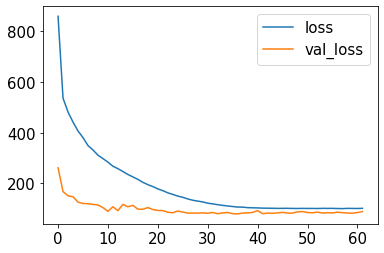

In [ ]:
model_losses.plot()

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score

In [ ]:
mean_absolute_error(y_test,predictions)

7.155929326139254

In [ ]:
np.sqrt(mean_squared_error(y_test,predictions))

9.397226490854257

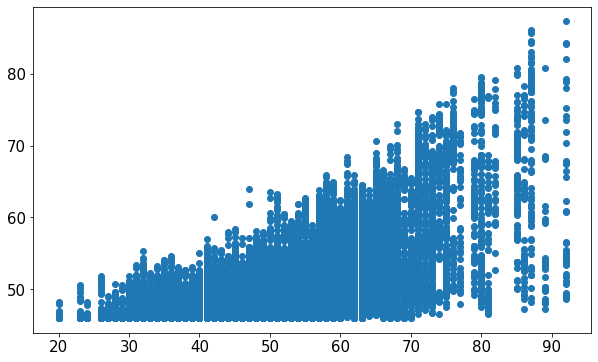

In [198]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,predictions)

In [199]:
sample = pd.DataFrame(predictions,columns=['Predict'])
sample['Actual']=y_test

In [200]:
sample.head(10)

,Predict,Actual
0,46.368195,49.0
1,45.974747,47.0
2,45.974747,37.0
3,59.382980,63.0
4,50.160568,57.0
5,53.815170,59.0
6,46.838505,37.0
7,45.980495,47.0
8,49.683220,45.0
9,48.919266,56.0
